# Modelos lineares e Modelos baseados em Árvores

## Introdução
Empresas de seguro saúde e planos de saúde possuem bases de clientes bastante heterogênias ao mesmo tempo em que devem minimizar as perdas com clientes que demandam muitos tratamentos ou tratamentos muito caros. Neste contexto, essas empresas tentam estimar qual os custos que cada paciente possivelmente vai gerar, afim de ajustar os custos de mensalidade e outras taxas, por exemplo.

Nesse contexto a base de dados [Medical Cost Personal Datasets](https://www.kaggle.com/mirichoi0218/insurance?select=insurance.csv) permite uma análise dos custos médicos de diversos pacientes.



## Imports

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso

## Medical Cost Personel
### Read

In [12]:
X = pd.read_csv('health_insurance_costs.csv')
display(X.head())
print(f'Dataframe shape: {X.shape}')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataframe shape: (1338, 7)


### Feature Engineering


In [13]:
y = X.charges
X.drop(['charges'], inplace=True, axis=1)
print(f'Features data shape: {X.shape}')
print(f'Target data shape: {y.shape}')

Features data shape: (1338, 6)
Target data shape: (1338,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.head()

,age,sex,bmi,children,smoker,region
1017,26,female,34.200,2,no,southwest
1056,48,female,28.900,0,no,southwest
254,50,male,31.825,0,yes,northeast
131,61,female,22.040,0,no,northeast
5,31,female,25.740,0,no,southeast


### Pipeline

In [15]:
#Linear------------------------------------------
encoders = [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder()]

for encoder in encoders:
    print(encoder)
    
    num_features = list(X_train.select_dtypes(include=['number']).columns)
    cat_features = list(X_train.select_dtypes(exclude=['number']).columns)
    
    preprocessor = make_column_transformer((StandardScaler(), num_features),
                                           (encoder, cat_features))

    ln_reg = make_pipeline(preprocessor, LinearRegression())
    #set_config(display='diagram')
    #set_config()
    display(ln_reg)
    
    ln_reg.fit(X_train, y_train)

    y_pred = ln_reg.predict(X_test)


    print('Training scores')
    y_hat = ln_reg.predict(X_train)
    mae = mean_absolute_error(y_train, y_hat)
    print('mae:', mae)
    mse = mean_squared_error(y_train, y_hat)
    print('mse:', mse)
    r2 = r2_score(y_train, y_hat)
    print('R2:', r2)

    print("\nPerformance no grupo de Teste:")
    mae = mean_absolute_error(y_test, y_pred)
    print('mae:', mae)
    mse = mean_squared_error(y_test, y_pred)
    print('mse:', mse)
    r2 = r2_score(y_test, y_pred)
    print('R2:', r2)
    print()

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                   

Training scores
mae: 4315.472394343128
mse: 38084532.6721839
R2: 0.7405029511662911

Performance no grupo de Teste:
mae: 3905.0677705973485
mse: 30478703.054930296
R2: 0.7905241502570153

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['sex', 'smoker', 'region'])],
                                   verbos

Training scores
mae: 4322.09255120676
mse: 38146075.11371107
R2: 0.7400836186752824

Performance no grupo de Teste:
mae: 3884.4834774964384
mse: 30291316.70287996
R2: 0.7918120303631745



In [16]:
#Lasso------------------------------------------
encoders = [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder()]

for encoder in encoders:
    print(encoder)
    
    num_features = list(X_train.select_dtypes(include=['number']).columns)
    cat_features = list(X_train.select_dtypes(exclude=['number']).columns)
    
    preprocessor = make_column_transformer((StandardScaler(), num_features),
                                           (encoder, cat_features))

    ls_reg = make_pipeline(preprocessor, Lasso(alpha=15))
    #set_config(display='diagram')
    #set_config()
    display(ls_reg)
    
    ls_reg.fit(X_train, y_train)

    y_pred = ls_reg.predict(X_test)


    print('Training scores')
    y_hat = ls_reg.predict(X_train)
    mae = mean_absolute_error(y_train, y_hat)
    print('mae:', mae)
    mse = mean_squared_error(y_train, y_hat)
    print('mse:', mse)
    r2 = r2_score(y_train, y_hat)
    print('R2:', r2)

    print("\nPerformance no grupo de Teste:")
    mae = mean_absolute_error(y_test, y_pred)
    print('mae:', mae)
    mse = mean_squared_error(y_test, y_pred)
    print('mse:', mse)
    r2 = r2_score(y_test, y_pred)
    print('R2:', r2)
    print()

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                   

Training scores
mae: 4316.925550350082
mse: 38091863.30318281
R2: 0.7404530023556628

Performance no grupo de Teste:
mae: 3908.2971518459517
mse: 30491400.807289224
R2: 0.7904368803866267

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['sex', 'smoker', 'region'])],
                                   verbos

Training scores
mae: 4324.659835355802
mse: 38149449.39958611
R2: 0.7400606272621009

Performance no grupo de Teste:
mae: 3887.7710550184684
mse: 30301702.76624226
R2: 0.7917406484069154



In [18]:
#RandomForestRegressor------------------------------------------
encoders = [OneHotEncoder(handle_unknown='ignore'), OrdinalEncoder()]

for encoder in encoders:
    print(encoder)
    
    num_features = list(X_train.select_dtypes(include=['number']).columns)
    cat_features = list(X_train.select_dtypes(exclude=['number']).columns)
    
    preprocessor = make_column_transformer((StandardScaler(), num_features),
                                           (encoder, cat_features))

    reg = make_pipeline(preprocessor, RandomForestRegressor())
    #set_config(display='diagram')
    #set_config()
    display(reg)
    
    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    print('Training scores')
    y_hat = reg.predict(X_train)
    mae = mean_absolute_error(y_train, y_hat)
    print('mae:', mae)
    mse = mean_squared_error(y_train, y_hat)
    print('mse:', mse)
    r2 = r2_score(y_train, y_hat)
    print('R2:', r2)

    print("\nPerformance no grupo de Teste:")
    mae = mean_absolute_error(y_test, y_pred)
    print('mae:', mae)
    mse = mean_squared_error(y_test, y_pred)
    print('mse:', mse)
    r2 = r2_score(y_test, y_pred)
    print('R2:', r2)
    print()

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='ignore', sparse=True)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                   

Training scores
mae: 1035.114360182654
mse: 3687318.7744162623
R2: 0.9748756707005883

Performance no grupo de Teste:
mae: 2554.500657331069
mse: 18179821.66382873
R2: 0.8750526364477172

OrdinalEncoder(categories='auto', dtype=<class 'numpy.float64'>)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi', 'children']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories='auto',
                                                                 dtype=<class 'numpy.float64'>),
                                                  ['sex', 'smoker...
                 RandomForestRegressor(bootstrap=True

Training scores
mae: 1051.9666360276933
mse: 3683644.407220656
R2: 0.9749007067815559

Performance no grupo de Teste:
mae: 2668.504528587506
mse: 18925418.105996482
R2: 0.8699282567125641



Feature ranking:
1. feature smoker (0.6038041117775581)
2. feature sex (0.22008613902942403)
3. feature age (0.13411778005907526)
4. feature bmi (0.02075459190829216)
5. feature region (0.015124365407932347)
6. feature children (0.006113011817718147)


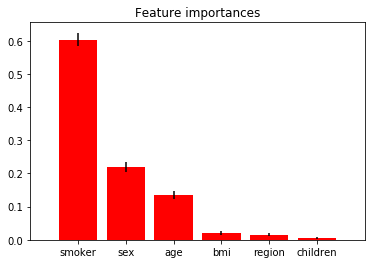

In [19]:
importances = reg.named_steps['randomforestregressor'].feature_importances_
std = np.std([tree.feature_importances_ for tree in reg.named_steps['randomforestregressor'].estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
features_names = (X_train.columns)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f+1}. feature {features_names[indices[f]]} ({importances[indices[f]]})")

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features_names[indices])
plt.xlim([-1, X.shape[1]])
plt.show()